# Ensembling Methods

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# read data into pandas dataframe

In [2]:
'''
here to learn ensemble we are using banking data where we are try find either person will pay loan or not
'''

'\nhere to learn ensemble we are using banking data where we are try find either person will pay loan or not\n'

In [3]:
df=pd.read_csv("data/bank.csv")

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null int64
marital      11162 non-null int64
education    11162 non-null int64
default      11162 non-null int64
balance      11162 non-null int64
housing      11162 non-null int64
loan         11162 non-null int64
contact      11162 non-null int64
day          11162 non-null int64
month        11162 non-null int64
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null int64
deposit      11162 non-null int64
dtypes: int64(17)
memory usage: 1.4 MB


In [6]:
df["deposit"].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

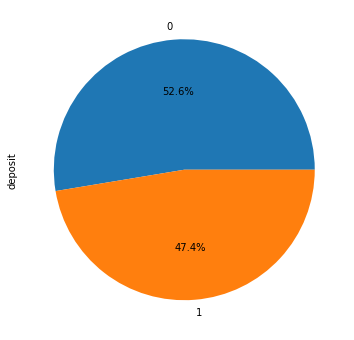

In [7]:
plt.figure(figsize=(6,6))
df["deposit"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [8]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0


In [10]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

# Naive Aggregation

In [12]:
lr=LogisticRegression()
dt1=DecisionTreeClassifier() # gini index 1-p^2-q^2
dt2=DecisionTreeClassifier(criterion="entropy") # entropy= 1- log(p)^2 -log(q)^2

In [13]:
model_list=[('lr',lr),('dt1',dt1),('dt2',dt2)]

In [14]:
from sklearn.ensemble import VotingClassifier

# 1) Hard Voting

In [15]:
#by default votingclassifier go with hard voting 
hvc=VotingClassifier(estimators=model_list)

In [16]:
hvc.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt1',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini'...
                              DecisionTr

In [17]:
y_pred=hvc.predict(x_test)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1760
           1       0.81      0.81      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



# 2) soft voting

In [19]:
svc=VotingClassifier(estimators=model_list,voting='soft')

In [20]:
svc.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt1',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini'...
                              DecisionTr

In [21]:
y_pred=svc.predict(x_test)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1760
           1       0.81      0.82      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



# BootStrap Aggregation (1- Bagging)

In [23]:
from sklearn.ensemble import BaggingClassifier

In [24]:
bg=BaggingClassifier(LogisticRegression(), n_estimators=10, max_samples=100,random_state=1)
'''
n_estimators=10 means 10 lr objects
max_samples=100 it's creat 100 random sample to train our model 
random_state=1 means similar type of sampling will happen in each machine execution 
'''

"\nn_estimators=10 means 10 lr objects\nmax_samples=100 it's creat 100 random sample to train our model \nrandom_state=1 means similar type of sampling will happen in each machine execution \n"

In [25]:
x_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
2506,74,5,1,0,0,0,0,0,1,13,1,562,2,-1,0,3
368,55,1,1,1,0,49,1,0,0,7,5,494,4,-1,0,3
2827,57,9,1,1,0,254,0,0,0,27,10,207,1,-1,0,3
9197,37,0,0,1,0,3975,1,0,0,11,8,163,2,-1,0,3
9910,56,4,2,2,0,6507,1,1,0,29,4,134,1,196,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,26,9,1,1,0,744,0,0,0,15,0,609,1,-1,0,3
10955,39,9,1,1,0,-1451,1,1,0,30,5,65,5,-1,0,3
905,27,2,1,1,0,2329,0,0,1,27,10,131,1,-1,0,3
5192,41,0,2,1,0,985,1,0,0,30,6,274,2,391,11,2


In [26]:
y_train

2506     1
368      1
2827     1
9197     0
9910     0
        ..
7813     0
10955    0
905      1
5192     1
235      1
Name: deposit, Length: 7813, dtype: int64

In [27]:
bg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=1, ve

In [28]:
y_pred=bg.predict(x_test)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1760
           1       0.78      0.70      0.74      1589

    accuracy                           0.77      3349
   macro avg       0.77      0.76      0.77      3349
weighted avg       0.77      0.77      0.77      3349



In [30]:
'''
when we are aware of data patterns which is good for logistic regression only we can go for 
bootstrap aggrigation 

but if data pattern is very complex and one ml algorith is not efficient enough to give 
better accuracy go for stacking or naive aggrigation 

bagging can be possible with replacement of data and without replacement of data 
if i am performing bagging without replacement it is known as pasting 
other process of bagging will be same 

'''

'\nwhen we are aware of data patterns which is good for logistic regression only we can go for \nbootstrap aggrigation \n\nbut if data pattern is very complex and one ml algorith is not efficient enough to give \nbetter accuracy go for stacking or naive aggrigation \n\nbagging can be possible with replacement of data and without replacement of data \nif i am performing bagging without replacement it is known as pasting \nother process of bagging will be same \n\n'

# BootStrap Aggregation (2- Pasting)

In [31]:
#bootstrap=False means no replacement or repeation in each sample of data 
bg2 = BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=100,random_state=1,bootstrap=False)

In [32]:
bg2.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=1, v

In [33]:
bg2.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=1, v

In [34]:
y_pred=bg2.predict(x_test)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79      1760
           1       0.78      0.71      0.74      1589

    accuracy                           0.77      3349
   macro avg       0.77      0.76      0.77      3349
weighted avg       0.77      0.77      0.77      3349



In [36]:
'''
either we take bagging or pasting no change in 10 estomator based ensemble model training 
so no need to go with pasting bagging is enough 
when my data have high bias at that time i can go with bagging 
'''

'\neither we take bagging or pasting no change in 10 estomator based ensemble model training \nso no need to go with pasting bagging is enough \nwhen my data have high bias at that time i can go with bagging \n'

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier # it is ensemble techniq 

In [38]:
'''
when our decision tree is not giving proper classification and my feature have 
varity of data at that time it is necessary we go feature by feature to classify our target 
for that we need more than 1 decision teach each feature have it's own decision tree
so the combination of multiple tree and it's classification known as random forest 
it is complex to understand as compare to decision tree but 
it reduces overfit problem it can be implemented when we have less amount of data 
as it required more memory and more processing time when we have more features at that time also
it is not suggested 
'''

"\nwhen our decision tree is not giving proper classification and my feature have \nvarity of data at that time it is necessary we go feature by feature to classify our target \nfor that we need more than 1 decision teach each feature have it's own decision tree\nso the combination of multiple tree and it's classification known as random forest \nit is complex to understand as compare to decision tree but \nit reduces overfit problem it can be implemented when we have less amount of data \nas it required more memory and more processing time when we have more features at that time also\nit is not suggested \n"

In [39]:
rf=RandomForestClassifier(n_estimators=10,max_features=16,random_state=1)

In [40]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813 entries, 2506 to 235
Data columns (total 16 columns):
age          7813 non-null int64
job          7813 non-null int64
marital      7813 non-null int64
education    7813 non-null int64
default      7813 non-null int64
balance      7813 non-null int64
housing      7813 non-null int64
loan         7813 non-null int64
contact      7813 non-null int64
day          7813 non-null int64
month        7813 non-null int64
duration     7813 non-null int64
campaign     7813 non-null int64
pdays        7813 non-null int64
previous     7813 non-null int64
poutcome     7813 non-null int64
dtypes: int64(16)
memory usage: 1.0 MB


In [41]:
rf.fit(x_train,y_train) #boostrap=True means repeation of data or replacement of data is allowed 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=16,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [42]:
y_pred=rf.predict(x_test)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1760
           1       0.81      0.83      0.82      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



In [44]:
# as per naive aggregation 2% accuracy increased 
# random forest find importenet features as well as perform missing value treatment also 

# stacking 

In [45]:
'''
it is hetro geneous we have seen naive agreggation as an example of stacking 
where we use votingclassifier and tried to understand soft voting and hard voting 
'''

'\nit is hetro geneous we have seen naive agreggation as an example of stacking \nwhere we use votingclassifier and tried to understand soft voting and hard voting \n'

In [46]:
# another library to perform stacking with advance feature 
! pip install mlxtend 

In [47]:
'''
as we know process of stacking where it uses multiple ml algorith and 
give prediction and those predicted target will be use again as a feature and develop 
meta model here also we took base model 
lr,dt gigi,dt entropy 
meta model is lr again 
'''

'\nas we know process of stacking where it uses multiple ml algorith and \ngive prediction and those predicted target will be use again as a feature and develop \nmeta model here also we took base model \nlr,dt gigi,dt entropy \nmeta model is lr again \n'

In [48]:
lr=LogisticRegression()
dt1=DecisionTreeClassifier()
dt2=DecisionTreeClassifier(criterion="entropy")
model_list=[lr,dt1,dt2]

In [49]:
meta_lr=LogisticRegression()
meta_dt=DecisionTreeClassifier()

In [50]:
from mlxtend.classifier import StackingClassifier
stack=StackingClassifier(classifiers=model_list, meta_classifier=meta_dt)

In [51]:
stack.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


StackingClassifier(average_probas=False,
                   classifiers=[LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                      

In [52]:
y_pred=stack.predict(x_test)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1760
           1       0.78      0.77      0.78      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349



# Boosting

In [54]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
# conda install -c anaconda py-xgboost
# ! pip3 install xgboost

# 1) Adaboost

In [56]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1760
           1       0.83      0.80      0.81      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



# 2) Gradientboost

In [59]:
#if i will not specify parameters then it will be greedy by nature so we decide to keep limited feature and max_depth
gb = GradientBoostingClassifier(n_estimators=20,
                                learning_rate = 0.5,
                                max_features=10,
                                max_depth = 2,
                                random_state = 0)
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1760
           1       0.81      0.83      0.82      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



In [61]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for i in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20,
                                    learning_rate = i,
                                    max_features=2,
                                    max_depth = 2,
                                    random_state = 1)
    gb.fit(x_train,y_train)
    print("Learning rate: ",i)
    print("Accuracy score (training): {0:.3f}".format(gb.score(x_train, y_train)))
    print("Accuracy score (testing): {0:.3f}".format(gb.score(x_test, y_test)))
    

Learning rate:  0.05
Accuracy score (training): 0.735
Accuracy score (testing): 0.715
Learning rate:  0.1
Accuracy score (training): 0.768
Accuracy score (testing): 0.752
Learning rate:  0.25
Accuracy score (training): 0.808
Accuracy score (testing): 0.796
Learning rate:  0.5
Accuracy score (training): 0.826
Accuracy score (testing): 0.815
Learning rate:  0.75
Accuracy score (training): 0.825
Accuracy score (testing): 0.819
Learning rate:  1
Accuracy score (training): 0.828
Accuracy score (testing): 0.821


# 3) xgboost

In [62]:
# For better results we need to  tune the parameters
from xgboost import XGBClassifier
xgboost = XGBClassifier(learning_rate =0.05,
 n_estimators=500,
 max_depth=2,
 min_child_weight=1)
xgboost.fit(x_train, y_train)
y_pred = gb.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1760
           1       0.81      0.82      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



In [ ]:
# allmost same to random forest 